# Sales analysis

#### The main objective is to find answers of some questions related to data using pandas 

In [1]:
#importing libraries
import pandas as pd
import os #to list all directories in single 
import datetime #to get specific month from date given
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
df=pd.read_csv(r'C:\Users\Subrata\Data analysis projetcs\Sales insights\Sales_April_2019.csv')
df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [3]:
#to see all directories in one list
files= [file for file in os.listdir(r"C:\Users\Subrata\Data analysis projetcs\Sales insights")]
for file in files:
    print(file)

Sales_April_2019.csv
Sales_August_2019.csv
Sales_December_2019.csv
Sales_February_2019.csv
Sales_January_2019.csv
Sales_July_2019.csv
Sales_June_2019.csv
Sales_March_2019.csv
Sales_May_2019.csv
Sales_November_2019.csv
Sales_October_2019.csv
Sales_September_2019.csv


In [4]:
#so this are total 12 directoris available which we need to merge in single data frame. So to do 
#that I need to convert all those to a data frame and then only I can merge them together  

In [5]:
total_df= pd.DataFrame()#blank data frame to append all the other datasets
#let's convert those directories into dataframe and then merge it in the dataframe accordingly 
for file in files:
    df1= pd.read_csv(r"C:\Users\Subrata\Data analysis projetcs\Sales insights\\"+file)
    total_df=pd.concat([total_df,df1])


In [6]:
total_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


In [7]:
#let's create csv file of the total data
total_df.to_csv("all_data.csv",index=False)


In [8]:
#let's read from new csv data
new_df=pd.read_csv("all_data.csv")
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
1,NaN,NaN,NaN,NaN,NaN,NaN
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"


#### Cleaning up the data

###### Dropping NaN values

In [9]:
new_df.isnull().sum() # so there are 545 rows with NaN data

Order ID            545
Product             545
Quantity Ordered    545
Price Each          545
Order Date          545
Purchase Address    545
dtype: int64

In [10]:
#displaying NaN values and storing them into one dataframe 
nan_df=new_df[new_df.isna().any(axis=1)]
nan_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
1,NaN,NaN,NaN,NaN,NaN,NaN
356,NaN,NaN,NaN,NaN,NaN,NaN
735,NaN,NaN,NaN,NaN,NaN,NaN
1433,NaN,NaN,NaN,NaN,NaN,NaN
1553,NaN,NaN,NaN,NaN,NaN,NaN


In [11]:
new_df=new_df.dropna(how="any")#any refers to drop if any row contains NaN.All refers to drop if all row contains
#Nan
new_df.isnull().sum()#checking for NaN after dropping

Order ID            0
Product             0
Quantity Ordered    0
Price Each          0
Order Date          0
Purchase Address    0
dtype: int64

In [12]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 186305 entries, 0 to 186849
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          186305 non-null  object
 1   Product           186305 non-null  object
 2   Quantity Ordered  186305 non-null  object
 3   Price Each        186305 non-null  object
 4   Order Date        186305 non-null  object
 5   Purchase Address  186305 non-null  object
dtypes: object(6)
memory usage: 9.9+ MB


In [13]:
#fixing while creating month column
new_df= new_df[new_df["Order Date"].str[:2]!="Or"]
new_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001"
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215"
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001"
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001"
...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001"
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016"
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016"
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016"


In [14]:
#adding month column
new_df["Month"]= new_df["Order Date"].str[0:2]
new_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month
0,176558,USB-C Charging Cable,2,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",04
2,176559,Bose SoundSport Headphones,1,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",04
3,176560,Google Phone,1,600,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
4,176560,Wired Headphones,1,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",04
5,176561,Wired Headphones,1,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",04
...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",09
186846,259354,iPhone,1,700,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",09
186847,259355,iPhone,1,700,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",09
186848,259356,34in Ultrawide Monitor,1,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",09


In [15]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   Order ID          185950 non-null  object
 1   Product           185950 non-null  object
 2   Quantity Ordered  185950 non-null  object
 3   Price Each        185950 non-null  object
 4   Order Date        185950 non-null  object
 5   Purchase Address  185950 non-null  object
 6   Month             185950 non-null  object
dtypes: object(7)
memory usage: 11.3+ MB


In [16]:
new_df["Month"].unique()

array(['04', '05', '08', '09', '12', '01', '02', '03', '07', '06', '11',
       '10'], dtype=object)

So we need to convert the "quantity ordered" and "Price each" datatype to float first 


In [17]:
new_df["Quantity Ordered"]=new_df["Quantity Ordered"].astype("float64")
new_df["Price Each"]=new_df["Price Each"].astype("float64")
new_df["Month"]=pd.to_numeric(new_df["Month"])#it will automatically change the dtype based on data 
new_df.info()#checking whether conversion is successful or not

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 7 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 11.3+ MB


In [18]:
new_df["Total_sales"]=new_df["Quantity Ordered"]*new_df["Price Each"]
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99


##### QS 1.What was the best month for sales? how much was earned that month? 

In [19]:
#let's answer the question
#as thedata is available for 12 months. We need to group the data by each month and then only this qs can be 
#answered. Here .sum is used to sum all numeric values of dataset.This is the we can ge the actual sum of sales 
results=new_df.groupby("Month").sum()
results

,Quantity Ordered,Price Each,Total_sales
Month,,,
1,10903.0,1.811768e+06,1.822257e+06
2,13449.0,2.188885e+06,2.202022e+06
3,17005.0,2.791208e+06,2.807100e+06
4,20558.0,3.367671e+06,3.390670e+06
5,18667.0,3.135125e+06,3.152607e+06
6,15253.0,2.562026e+06,2.577802e+06
7,16072.0,2.632540e+06,2.647776e+06
8,13448.0,2.230345e+06,2.244468e+06
9,13109.0,2.084992e+06,2.097560e+06


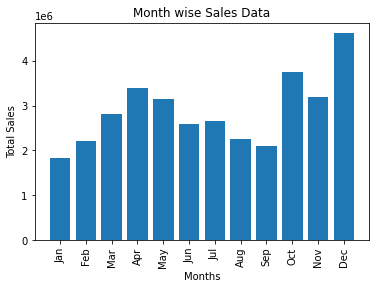

In [20]:
#let's visualise this data with bar plot. Bar plot is best suited here as Total_sales are nothin but
#frequencies which can be plotted against the number of month
months=range(1,13)
plt.bar(months,results["Total_sales"])
labels=["Jan","Feb","Mar","Apr","May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"]
plt.xlabel("Months")
plt.ylabel("Total Sales")
plt.title("Month wise Sales Data")
plt.xticks(months,labels, rotation="vertical")
plt.show()

ANSWER of QS1: Highest sales was happened in the month of December followed by October. Though there is plenty of gap between December and October. The main reason could be Christmas as people usually buys lot of gifts in December for their friends and families 

#### QS 2: What City had the higest number of sales?


In [21]:
#To answer this we need to create a column city. In property address it is observed that middle string is city. 
#But it may possible that city name could be duplicated based on different state i.e 2 state may have cities with 
#same. To bifurcate this let's take city name along with state name and zip code 

In [22]:
def getcity(x):
    return x.split(', ')[1]
def getstate(x):
    return x.split(', ')[2].split(" ")[0]

In [23]:
getstate("917 1st St, Dallas, TX 75001") #Ok the function is working properly.Let's apply it 

'TX'

In [24]:
#now adding the city column based on above function 

In [25]:
new_df["City"]= new_df["Purchase Address"].apply(lambda x:getcity(x)+"("+getstate(x)+")")
#this code can be writen with f string as well. below is the demonstration 
# new_df["City"]= new_df["Purchase Address"].apply(lambda x:f"{getcity(x)} ({getstate(x)})")
new_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1.0,11.99,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1.0,11.99,04/30/19 09:27,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,09/17/19 20:56,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles(CA)
186846,259354,iPhone,1.0,700.00,09/01/19 16:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco(CA)
186847,259355,iPhone,1.0,700.00,09/23/19 07:39,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco(CA)
186848,259356,34in Ultrawide Monitor,1.0,379.99,09/19/19 17:30,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco(CA)


In [26]:
#to answer the 2nd qs we need to check for individual cities and then can check for total sales value
city_wise=new_df.groupby("City").sum()
city_wise#This Will display city wise highest sales

,Quantity Ordered,Price Each,Month,Total_sales
City,,,,
Atlanta(GA),16602.0,2.779908e+06,104794,2.795499e+06
Austin(TX),11153.0,1.809874e+06,69829,1.819582e+06
Boston(MA),22528.0,3.637410e+06,141112,3.661642e+06
Dallas(TX),16730.0,2.752628e+06,104620,2.767975e+06
Los Angeles(CA),33289.0,5.421435e+06,208325,5.452571e+06
New York City(NY),27932.0,4.635371e+06,175741,4.664317e+06
Portland(ME),2750.0,4.471893e+05,17144,4.497583e+05
Portland(OR),11303.0,1.860558e+06,70621,1.870732e+06
San Francisco(CA),50239.0,8.211462e+06,315520,8.262204e+06


In [27]:
city_month=new_df.groupby(["City","Month"]).sum()
city_month#this will display city wise highest sale on each months basis

Quantity Ordered  Price Each  Total_sales
City        Month                                           
Atlanta(GA) 1                 876.0   148523.69    149159.54
            2                1042.0   175851.81    176470.30
            3                1384.0   230134.86    231905.38
            4                1634.0   282870.88    284448.91
            5                1502.0   237572.66    238853.99
...                             ...         ...          ...
Seattle(WA) 8                1147.0   188466.05    189715.09
            9                1059.0   155312.63    156369.27
            10               1877.0   314801.51    316856.26
            11               1583.0   250620.69    252080.13
            12               2203.0   386152.70    387317.93

[120 rows x 3 columns]

So it is clear from the above table that in San Francisco highest amount of sales has occcured. This is possible as the city is full of cultures and festivals. In terms of development and living standard this city is one of the most lavish city in all over the world.Also the demand for elecrtronics is pretty high in this city. 

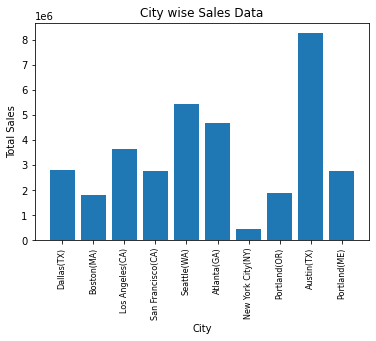

In [28]:
#visual representation
plt.bar(new_df.City.unique(),city_wise["Total_sales"])
cities=new_df.City.unique()
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.title("City wise Sales Data")
plt.xticks(cities,rotation="vertical", size=8)
plt.show()

Here it seems the plot is totally wrong as from our table San Francisco has the highest number of sales whereas here Austin is showing the highest. This is happening because when we are taking new_df.City.unique it is ordering somewhat different to the order of city_wise["Total_sales"]  . To fix the issue we need to create the series same way like creating city_wise dataframe i.e groupby based on cities. Let's implement the concept here 

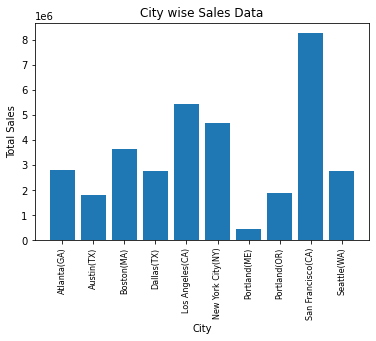

In [29]:
#corrected representation
cities=[city[0] for city in new_df.groupby("City")]#1st way
# cities=[city for city, df in new_df.groupby("City")]#2nd way
plt.bar(cities,city_wise["Total_sales"])
plt.xlabel("City")
plt.ylabel("Total Sales")
plt.title("City wise Sales Data")
plt.xticks(cities,rotation="vertical", size=8)
plt.show()

#### QS 3: What time should we display advertisement to maximize likelihood of customer's buying product?

In [30]:
#so here we need to go through the time factor to understand the tendency of buyers like at what time they are 
#coming to purchase 

In [31]:
new_df.head(3)

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City
0,176558,USB-C Charging Cable,2.0,11.95,04/19/19 08:46,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,04/07/19 22:30,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1.0,600.00,04/12/19 14:38,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)


In [32]:
new_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 185950 entries, 0 to 186849
Data columns (total 9 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   Order ID          185950 non-null  object 
 1   Product           185950 non-null  object 
 2   Quantity Ordered  185950 non-null  float64
 3   Price Each        185950 non-null  float64
 4   Order Date        185950 non-null  object 
 5   Purchase Address  185950 non-null  object 
 6   Month             185950 non-null  int64  
 7   Total_sales       185950 non-null  float64
 8   City              185950 non-null  object 
dtypes: float64(3), int64(1), object(5)
memory usage: 14.2+ MB


In [33]:
new_df["Order Date"].unique()#it is in 24-hours format. 

array(['04/19/19 08:46', '04/07/19 22:30', '04/12/19 14:38', ...,
       '09/23/19 07:39', '09/19/19 17:30', '09/30/19 00:18'], dtype=object)

In [34]:
#here we can see that Order Date is in object format. Let's just convert it into Datetime format 
#to avoid any mistakes

In [35]:
new_df["Order Date"]= pd.to_datetime(new_df["Order Date"])
new_df

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX)
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA)
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA)
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA)
...,...,...,...,...,...,...,...,...,...
186845,259353,AAA Batteries (4-pack),3.0,2.99,2019-09-17 20:56:00,"840 Highland St, Los Angeles, CA 90001",9,8.97,Los Angeles(CA)
186846,259354,iPhone,1.0,700.00,2019-09-01 16:00:00,"216 Dogwood St, San Francisco, CA 94016",9,700.00,San Francisco(CA)
186847,259355,iPhone,1.0,700.00,2019-09-23 07:39:00,"220 12th St, San Francisco, CA 94016",9,700.00,San Francisco(CA)
186848,259356,34in Ultrawide Monitor,1.0,379.99,2019-09-19 17:30:00,"511 Forest St, San Francisco, CA 94016",9,379.99,San Francisco(CA)


In [36]:
#Let's just create a column namely Hour for further calculation
new_df["Hour"]=new_df["Order Date"].dt.hour
new_df["Minute"]=new_df["Order Date"].dt.minute
new_df.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


In [37]:
#Let's check at which hour most sales are happened 
Hour_wise= new_df.groupby("Hour").sum()
Hour_wise[Hour_wise["Total_sales"]==Hour_wise.Total_sales.max()]
#so it is clear from the data that at 7pm or 19 hours maximum sales are being happpened

,Quantity Ordered,Price Each,Month,Total_sales,Minute
Hour,,,,,
19,14470.0,2398588.31,91389,2412938.54,381042


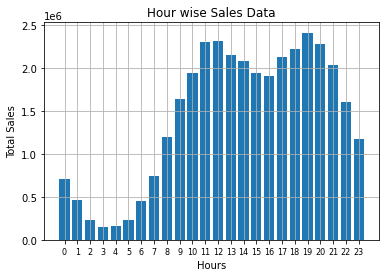

In [38]:
#checking the hour_wise representation in visual manner 
hours=[hour for hour, df in new_df.groupby("Hour")]
plt.bar(hours, Hour_wise["Total_sales"])
plt.xlabel("Hours")
plt.ylabel("Total Sales")
plt.grid()
plt.title("Hour wise Sales Data")
plt.xticks(hours,size=8)
plt.show()

From the visual representation it is observed that maximum sales are done at 19-20 hours follwed by 11-12 hours. This is possible because this time is the prime time of business activity and purchasers are likely to go outside to but their desired products. Before 11 am in the morning people are normally involved in their household work and after 8 pm in the evening or rather after 9 people tend to return to their destination for dinner and other household work. So the best time for advertisement must be around 7-8 pm in the evening and 11am-12pm in the morning 

#### QS4: What products are most often sold together?

In [39]:
new_df.Product.value_counts()

USB-C Charging Cable          21903
Lightning Charging Cable      21658
AAA Batteries (4-pack)        20641
AA Batteries (4-pack)         20577
Wired Headphones              18882
Apple Airpods Headphones      15549
Bose SoundSport Headphones    13325
27in FHD Monitor               7507
iPhone                         6842
27in 4K Gaming Monitor         6230
34in Ultrawide Monitor         6181
Google Phone                   5525
Flatscreen TV                  4800
Macbook Pro Laptop             4724
ThinkPad Laptop                4128
20in Monitor                   4101
Vareebadd Phone                2065
LG Washing Machine              666
LG Dryer                        646
Name: Product, dtype: int64

So highest selling items are USB c type followed by Lightning charging cable and AAA batteries

In [40]:
#This question can be answered by checking Order ID. If order ID of two or more products are same then 
#those products are sold altogether . Let's check how many duplicates Order IDs are available 
df_orderID=new_df[new_df["Order ID"].duplicated(keep=False)]
df_orderID.head(15)#it is seen that Order IDs are duplicated with multiple product purchase

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City,Hour,Minute
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),19,42
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles(CA),19,42
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),11,31
31,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),11,31
32,176586,AAA Batteries (4-pack),2.0,2.99,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,5.98,San Francisco(CA),17,0
33,176586,Google Phone,1.0,600.00,2019-04-10 17:00:00,"365 Center St, San Francisco, CA 94016",4,600.00,San Francisco(CA),17,0
119,176672,Lightning Charging Cable,1.0,14.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,14.95,New York City(NY),11,7
120,176672,USB-C Charging Cable,1.0,11.95,2019-04-12 11:07:00,"778 Maple St, New York City, NY 10001",4,11.95,New York City(NY),11,7


In [41]:
group_id= df_orderID.groupby("Order ID")
for i, j in group_id:
    print(i)
    print(j["Product"])
#so here we can see that based on single order ID the products can be grouped and checked together
#so if we can make a column with grouped products and can find maximum number of quantity orders of those grouped
#columns then the qs can be answered 

141275
67588    USB-C Charging Cable
67589        Wired Headphones
Name: Product, dtype: object
141290
67604    Apple Airpods Headphones
67605       AA Batteries (4-pack)
Name: Product, dtype: object
141365
67680     Vareebadd Phone
67681    Wired Headphones
Name: Product, dtype: object
141384
67700            Google Phone
67701    USB-C Charging Cable
Name: Product, dtype: object
141450
67767                  Google Phone
67768    Bose SoundSport Headphones
Name: Product, dtype: object
141457
67775                      iPhone
67776    Apple Airpods Headphones
Name: Product, dtype: object
141478
67797                Google Phone
67798    Apple Airpods Headphones
Name: Product, dtype: object
141550
67870                      iPhone
67871    Apple Airpods Headphones
67872            Wired Headphones
Name: Product, dtype: object
141587
67909        USB-C Charging Cable
67910    Apple Airpods Headphones
Name: Product, dtype: object
141645
67968    Lightning Charging Cable
67969            

143439
69873        Google Phone
69874    Wired Headphones
Name: Product, dtype: object
143455
69890    AAA Batteries (4-pack)
69891             Flatscreen TV
Name: Product, dtype: object
143526
69962              iPhone
69963    Wired Headphones
Name: Product, dtype: object
143545
69982     Vareebadd Phone
69983    Wired Headphones
Name: Product, dtype: object
143572
70011    AAA Batteries (4-pack)
70012      USB-C Charging Cable
Name: Product, dtype: object
143590
70030                      iPhone
70031    Lightning Charging Cable
Name: Product, dtype: object
143623
70064    USB-C Charging Cable
70065        27in FHD Monitor
Name: Product, dtype: object
143628
70070     AA Batteries (4-pack)
70071    27in 4K Gaming Monitor
Name: Product, dtype: object
143630
70073              iPhone
70074    Wired Headphones
Name: Product, dtype: object
143632
70076            Google Phone
70077    USB-C Charging Cable
70078        Wired Headphones
Name: Product, dtype: object
143641
70087    USB-C 

145256
71791                      iPhone
71792    Lightning Charging Cable
Name: Product, dtype: object
145300
71836          Wired Headphones
71837    AAA Batteries (4-pack)
Name: Product, dtype: object
145364
71901        AAA Batteries (4-pack)
71902    Bose SoundSport Headphones
Name: Product, dtype: object
145369
71907    AAA Batteries (4-pack)
71908             Flatscreen TV
Name: Product, dtype: object
145388
71927            Google Phone
71928    USB-C Charging Cable
Name: Product, dtype: object
145445
71985    Bose SoundSport Headphones
71986                  20in Monitor
Name: Product, dtype: object
145579
72120      AAA Batteries (4-pack)
72121    Lightning Charging Cable
Name: Product, dtype: object
145588
72130            Google Phone
72131    USB-C Charging Cable
Name: Product, dtype: object
145602
72145                      iPhone
72146    Lightning Charging Cable
Name: Product, dtype: object
145650
72194    Apple Airpods Headphones
72195        USB-C Charging Cable
Name:

75547                      iPhone
75548    Lightning Charging Cable
Name: Product, dtype: object
148896
75583            Macbook Pro Laptop
75584    Bose SoundSport Headphones
Name: Product, dtype: object
148912
75600         Vareebadd Phone
75601    USB-C Charging Cable
75602        Wired Headphones
Name: Product, dtype: object
148932
75622              iPhone
75623    Wired Headphones
Name: Product, dtype: object
148933
75624    AAA Batteries (4-pack)
75625          Wired Headphones
Name: Product, dtype: object
148944
75636                      iPhone
75637    Lightning Charging Cable
Name: Product, dtype: object
148948
75641                      iPhone
75642    Lightning Charging Cable
Name: Product, dtype: object
148960
75654            Google Phone
75655    USB-C Charging Cable
Name: Product, dtype: object
148971
75666    Bose SoundSport Headphones
75667        27in 4K Gaming Monitor
Name: Product, dtype: object
148984
75680    USB-C Charging Cable
75681    USB-C Charging Cable
Na

56912               Vareebadd Phone
56913    Bose SoundSport Headphones
Name: Product, dtype: object
151851
56921                  Google Phone
56922    Bose SoundSport Headphones
Name: Product, dtype: object
151856
56927    USB-C Charging Cable
56928    USB-C Charging Cable
Name: Product, dtype: object
151858
56930            Google Phone
56931    USB-C Charging Cable
Name: Product, dtype: object
151902
56975    Google Phone
56976          iPhone
Name: Product, dtype: object
151958
57035        Google Phone
57036    Wired Headphones
Name: Product, dtype: object
151959
57037            Google Phone
57038    USB-C Charging Cable
Name: Product, dtype: object
151961
57040               Vareebadd Phone
57041          USB-C Charging Cable
57042    Bose SoundSport Headphones
Name: Product, dtype: object
151976
57057        AAA Batteries (4-pack)
57058    Bose SoundSport Headphones
Name: Product, dtype: object
151992
57074        USB-C Charging Cable
57075    Apple Airpods Headphones
Name: Pr

155041
60272                  Google Phone
60273    Bose SoundSport Headphones
Name: Product, dtype: object
155053
60285                  Google Phone
60286    Bose SoundSport Headphones
60287              Wired Headphones
Name: Product, dtype: object
155057
60291         Vareebadd Phone
60292    USB-C Charging Cable
Name: Product, dtype: object
155071
60306         Vareebadd Phone
60307    USB-C Charging Cable
Name: Product, dtype: object
155117
60353            Wired Headphones
60354    Lightning Charging Cable
Name: Product, dtype: object
155130
60367    AAA Batteries (4-pack)
60368     AA Batteries (4-pack)
Name: Product, dtype: object
155185
60423      27in FHD Monitor
60424    Macbook Pro Laptop
Name: Product, dtype: object
155205
60444                      iPhone
60445    Lightning Charging Cable
Name: Product, dtype: object
155209
60449    27in 4K Gaming Monitor
60450      USB-C Charging Cable
Name: Product, dtype: object
155237
60478              iPhone
60479    Wired Headphon

157667
63033      USB-C Charging Cable
63034    AAA Batteries (4-pack)
Name: Product, dtype: object
157688
63055                      iPhone
63056    Apple Airpods Headphones
Name: Product, dtype: object
157724
63092                      iPhone
63093    Lightning Charging Cable
Name: Product, dtype: object
157735
63104        USB-C Charging Cable
63105    Apple Airpods Headphones
Name: Product, dtype: object
157794
63164    Lightning Charging Cable
63165             ThinkPad Laptop
Name: Product, dtype: object
157827
63198    27in FHD Monitor
63199            LG Dryer
Name: Product, dtype: object
157845
63217                      iPhone
63218    Lightning Charging Cable
Name: Product, dtype: object
157909
63283    27in FHD Monitor
63284        20in Monitor
Name: Product, dtype: object
157960
63335    Lightning Charging Cable
63336                Google Phone
Name: Product, dtype: object
158022
63398    Lightning Charging Cable
63399            Wired Headphones
Name: Product, dtype: obj

161684
67209             ThinkPad Laptop
67210    Apple Airpods Headphones
Name: Product, dtype: object
161733
67259      AAA Batteries (4-pack)
67260    Lightning Charging Cable
Name: Product, dtype: object
161806
67333                      iPhone
67334    Apple Airpods Headphones
Name: Product, dtype: object
161850
67378     AA Batteries (4-pack)
67379    AAA Batteries (4-pack)
Name: Product, dtype: object
161861
67390    Lightning Charging Cable
67391            Wired Headphones
Name: Product, dtype: object
161891
67421          LG Washing Machine
67422    Lightning Charging Cable
Name: Product, dtype: object
161920
67451              Google Phone
67452      USB-C Charging Cable
67453    AAA Batteries (4-pack)
Name: Product, dtype: object
161945
67478      USB-C Charging Cable
67479    34in Ultrawide Monitor
Name: Product, dtype: object
161960
67495         Vareebadd Phone
67496    USB-C Charging Cable
Name: Product, dtype: object
161972
67508            Google Phone
67509    USB-C 

164880
108286    Wired Headphones
108287     Vareebadd Phone
Name: Product, dtype: object
164903
108311    Apple Airpods Headphones
108312       AA Batteries (4-pack)
Name: Product, dtype: object
164928
108337    Lightning Charging Cable
108338       AA Batteries (4-pack)
Name: Product, dtype: object
164977
108387                      iPhone
108388    Lightning Charging Cable
Name: Product, dtype: object
164985
108396        Google Phone
108397    Wired Headphones
Name: Product, dtype: object
165051
108463         Vareebadd Phone
108464    USB-C Charging Cable
Name: Product, dtype: object
165103
108516    AA Batteries (4-pack)
108517             Google Phone
Name: Product, dtype: object
165115
108529                  Google Phone
108530    Bose SoundSport Headphones
Name: Product, dtype: object
165122
108537        USB-C Charging Cable
108538    Apple Airpods Headphones
Name: Product, dtype: object
165123
108539            Wired Headphones
108540    Lightning Charging Cable
Name: Produ

168777
112349                      iPhone
112350    Lightning Charging Cable
112351    Lightning Charging Cable
Name: Product, dtype: object
168778
112352    Bose SoundSport Headphones
112353              27in FHD Monitor
Name: Product, dtype: object
168806
112381                      iPhone
112382    Lightning Charging Cable
Name: Product, dtype: object
168818
112394    AAA Batteries (4-pack)
112395     AA Batteries (4-pack)
Name: Product, dtype: object
168888
112465    AA Batteries (4-pack)
112466    AA Batteries (4-pack)
Name: Product, dtype: object
168890
112468    AAA Batteries (4-pack)
112469          Wired Headphones
Name: Product, dtype: object
168900
112479      AAA Batteries (4-pack)
112480    Lightning Charging Cable
Name: Product, dtype: object
168905
112485    USB-C Charging Cable
112486         ThinkPad Laptop
Name: Product, dtype: object
168910
112491      27in 4K Gaming Monitor
112492    Lightning Charging Cable
Name: Product, dtype: object
168938
112520                

171622
115321            Google Phone
115322    USB-C Charging Cable
Name: Product, dtype: object
171639
115339    AAA Batteries (4-pack)
115340     AA Batteries (4-pack)
Name: Product, dtype: object
171645
115346                      iPhone
115347    Lightning Charging Cable
Name: Product, dtype: object
171658
115360        Google Phone
115361    Wired Headphones
Name: Product, dtype: object
171711
115414        Google Phone
115415    Wired Headphones
Name: Product, dtype: object
171801
115506                      iPhone
115507    Apple Airpods Headphones
Name: Product, dtype: object
171806
115512                      iPhone
115513    Lightning Charging Cable
Name: Product, dtype: object
171825
115532                      iPhone
115533    Lightning Charging Cable
Name: Product, dtype: object
171843
115551                  Google Phone
115552    Bose SoundSport Headphones
Name: Product, dtype: object
171896
115606         Vareebadd Phone
115607    USB-C Charging Cable
Name: Product, dt

Name: Product, dtype: object
174496
118337            Google Phone
118338    USB-C Charging Cable
Name: Product, dtype: object
174506
118348    Lightning Charging Cable
118349                20in Monitor
Name: Product, dtype: object
174509
118352        Wired Headphones
118353    USB-C Charging Cable
Name: Product, dtype: object
174515
118359         Vareebadd Phone
118360    USB-C Charging Cable
Name: Product, dtype: object
174527
118372    USB-C Charging Cable
118373        27in FHD Monitor
Name: Product, dtype: object
174531
118377    Lightning Charging Cable
118378                20in Monitor
Name: Product, dtype: object
174555
118402            Google Phone
118403    USB-C Charging Cable
Name: Product, dtype: object
174558
118406      Lightning Charging Cable
118407    Bose SoundSport Headphones
Name: Product, dtype: object
174655
118504    Bose SoundSport Headphones
118505          USB-C Charging Cable
Name: Product, dtype: object
174662
118512              iPhone
118513    Wired

Name: Product, dtype: object
177874
1385                      iPhone
1386    Apple Airpods Headphones
Name: Product, dtype: object
177971
1484                      iPhone
1485    Lightning Charging Cable
Name: Product, dtype: object
177996
1510                      iPhone
1511    Lightning Charging Cable
Name: Product, dtype: object
178009
1524    34in Ultrawide Monitor
1525      USB-C Charging Cable
Name: Product, dtype: object
178029
1545                      iPhone
1546    Apple Airpods Headphones
Name: Product, dtype: object
178106
1625    AAA Batteries (4-pack)
1626          Wired Headphones
Name: Product, dtype: object
178118
1638                    iPhone
1639    AAA Batteries (4-pack)
Name: Product, dtype: object
178135
1656    Lightning Charging Cable
1657       AA Batteries (4-pack)
Name: Product, dtype: object
178137
1659    Lightning Charging Cable
1660       AA Batteries (4-pack)
Name: Product, dtype: object
178158
1681            Google Phone
1682    USB-C Charging Cable


181476
5149     Vareebadd Phone
5150    Wired Headphones
Name: Product, dtype: object
181515
5189        Google Phone
5190    Wired Headphones
Name: Product, dtype: object
181557
5232            Google Phone
5233    USB-C Charging Cable
Name: Product, dtype: object
181660
5337        AAA Batteries (4-pack)
5338    Bose SoundSport Headphones
Name: Product, dtype: object
181697
5375            Google Phone
5376    USB-C Charging Cable
Name: Product, dtype: object
181807
5486                      iPhone
5487    Lightning Charging Cable
Name: Product, dtype: object
181819
5499     Vareebadd Phone
5500    Wired Headphones
Name: Product, dtype: object
181823
5504    Bose SoundSport Headphones
5505        AAA Batteries (4-pack)
Name: Product, dtype: object
181843
5525                      iPhone
5526    Apple Airpods Headphones
Name: Product, dtype: object
181862
5545                      iPhone
5546    Apple Airpods Headphones
Name: Product, dtype: object
181904
5589                      iPh

Name: Product, dtype: object
184221
8027              iPhone
8028    Wired Headphones
Name: Product, dtype: object
184252
8059               ThinkPad Laptop
8060    Bose SoundSport Headphones
Name: Product, dtype: object
184272
8080                      iPhone
8081    Lightning Charging Cable
Name: Product, dtype: object
184281
8090                      iPhone
8091    Apple Airpods Headphones
Name: Product, dtype: object
184334
8144                  20in Monitor
8145    Bose SoundSport Headphones
Name: Product, dtype: object
184447
8258                      iPhone
8259    Lightning Charging Cable
Name: Product, dtype: object
184460
8272              iPhone
8273    Wired Headphones
Name: Product, dtype: object
184472
8285                        iPhone
8286    Bose SoundSport Headphones
Name: Product, dtype: object
184503
8317                      iPhone
8318    Lightning Charging Cable
Name: Product, dtype: object
184577
8392                      iPhone
8393    Lightning Charging Cable


188107
12110    Apple Airpods Headphones
12111               Flatscreen TV
Name: Product, dtype: object
188113
12118    AAA Batteries (4-pack)
12119      USB-C Charging Cable
Name: Product, dtype: object
188122
12128                      iPhone
12129    Lightning Charging Cable
Name: Product, dtype: object
188142
12149          ThinkPad Laptop
12150    AA Batteries (4-pack)
Name: Product, dtype: object
188222
12230    AAA Batteries (4-pack)
12231     AA Batteries (4-pack)
Name: Product, dtype: object
188269
12278    27in FHD Monitor
12279              iPhone
Name: Product, dtype: object
188303
12313                      iPhone
12314    Apple Airpods Headphones
Name: Product, dtype: object
188326
12337    Bose SoundSport Headphones
12338      Lightning Charging Cable
Name: Product, dtype: object
188332
12344         Vareebadd Phone
12345    USB-C Charging Cable
Name: Product, dtype: object
188340
12353    Bose SoundSport Headphones
12354              Wired Headphones
Name: Product, dtyp

Name: Product, dtype: object
191453
15614              iPhone
15615    Wired Headphones
Name: Product, dtype: object
191497
15659            Google Phone
15660    USB-C Charging Cable
Name: Product, dtype: object
191512
15675        USB-C Charging Cable
15676    Apple Airpods Headphones
Name: Product, dtype: object
191538
15702            Google Phone
15703    USB-C Charging Cable
Name: Product, dtype: object
191547
15712    34in Ultrawide Monitor
15713                    iPhone
Name: Product, dtype: object
191561
15727    Bose SoundSport Headphones
15728        AAA Batteries (4-pack)
Name: Product, dtype: object
191608
15775            Google Phone
15776    USB-C Charging Cable
Name: Product, dtype: object
191610
15778    AAA Batteries (4-pack)
15779     AA Batteries (4-pack)
Name: Product, dtype: object
191617
15786    USB-C Charging Cable
15787        Wired Headphones
Name: Product, dtype: object
191648
15818             Vareebadd Phone
15819    Lightning Charging Cable
Name: Produc

194416
120831            Google Phone
120832    USB-C Charging Cable
Name: Product, dtype: object
194426
120842                  Google Phone
120843    Bose SoundSport Headphones
Name: Product, dtype: object
194474
120891        Wired Headphones
120892    USB-C Charging Cable
Name: Product, dtype: object
194494
120912        Google Phone
120913    Wired Headphones
Name: Product, dtype: object
194509
120928    Apple Airpods Headphones
120929    Lightning Charging Cable
Name: Product, dtype: object
194511
120931            Google Phone
120932    USB-C Charging Cable
Name: Product, dtype: object
194566
120987                  Google Phone
120988    Bose SoundSport Headphones
Name: Product, dtype: object
194575
120997     AA Batteries (4-pack)
120998    AAA Batteries (4-pack)
Name: Product, dtype: object
194588
121012           ThinkPad Laptop
121013    AAA Batteries (4-pack)
Name: Product, dtype: object
194600
121025    Lightning Charging Cable
121026            27in FHD Monitor
Name: Pro

197786
124371            Google Phone
124372    USB-C Charging Cable
Name: Product, dtype: object
197798
124384            Google Phone
124385    USB-C Charging Cable
Name: Product, dtype: object
197812
124399                      iPhone
124400    Apple Airpods Headphones
Name: Product, dtype: object
197813
124401    Apple Airpods Headphones
124402            27in FHD Monitor
Name: Product, dtype: object
197841
124431    Apple Airpods Headphones
124432      AAA Batteries (4-pack)
Name: Product, dtype: object
197845
124436    USB-C Charging Cable
124437    USB-C Charging Cable
Name: Product, dtype: object
197852
124444              Google Phone
124445      USB-C Charging Cable
124446    AAA Batteries (4-pack)
Name: Product, dtype: object
197900
124495         27in FHD Monitor
124496    AA Batteries (4-pack)
Name: Product, dtype: object
197901
124497            Google Phone
124498    USB-C Charging Cable
Name: Product, dtype: object
197905
124502                20in Monitor
124503    Lig

Name: Product, dtype: object
200506
127241    AAA Batteries (4-pack)
127242          27in FHD Monitor
Name: Product, dtype: object
200527
127263      Macbook Pro Laptop
127264    USB-C Charging Cable
Name: Product, dtype: object
200531
127268    AAA Batteries (4-pack)
127269      USB-C Charging Cable
Name: Product, dtype: object
200546
127284         Vareebadd Phone
127285    USB-C Charging Cable
Name: Product, dtype: object
200568
127307              iPhone
127308    Wired Headphones
Name: Product, dtype: object
200575
127315                      iPhone
127316    Lightning Charging Cable
Name: Product, dtype: object
200583
127324              iPhone
127325    Wired Headphones
Name: Product, dtype: object
200595
127337    USB-C Charging Cable
127338           Flatscreen TV
Name: Product, dtype: object
200596
127339    Bose SoundSport Headphones
127340        27in 4K Gaming Monitor
Name: Product, dtype: object
200641
127385    Lightning Charging Cable
127386      27in 4K Gaming Monitor


Name: Product, dtype: object
203235
130118    AAA Batteries (4-pack)
130119    34in Ultrawide Monitor
Name: Product, dtype: object
203245
130129                      iPhone
130130    Lightning Charging Cable
Name: Product, dtype: object
203284
130169             ThinkPad Laptop
130170    Lightning Charging Cable
Name: Product, dtype: object
203328
130214         27in FHD Monitor
130215    AA Batteries (4-pack)
Name: Product, dtype: object
203365
130253                  Google Phone
130254    Bose SoundSport Headphones
130255      Apple Airpods Headphones
Name: Product, dtype: object
203370
130260                      iPhone
130261    Lightning Charging Cable
Name: Product, dtype: object
203384
130276        Macbook Pro Laptop
130277    27in 4K Gaming Monitor
Name: Product, dtype: object
203392
130285         Vareebadd Phone
130286    USB-C Charging Cable
Name: Product, dtype: object
203395
130289    AAA Batteries (4-pack)
130290    AAA Batteries (4-pack)
Name: Product, dtype: object
20

Name: Product, dtype: object
205503
132486                      iPhone
132487    Apple Airpods Headphones
Name: Product, dtype: object
205529
132513         Vareebadd Phone
132514    USB-C Charging Cable
132515        Wired Headphones
Name: Product, dtype: object
205532
132518      34in Ultrawide Monitor
132519    Lightning Charging Cable
Name: Product, dtype: object
205582
132569    Wired Headphones
132570              iPhone
Name: Product, dtype: object
205589
132577            Google Phone
132578    USB-C Charging Cable
Name: Product, dtype: object
205607
132596    AA Batteries (4-pack)
132597    AA Batteries (4-pack)
Name: Product, dtype: object
205667
132657    27in 4K Gaming Monitor
132658      USB-C Charging Cable
Name: Product, dtype: object
205678
132669    AA Batteries (4-pack)
132670                   iPhone
Name: Product, dtype: object
205702
132694    Apple Airpods Headphones
132695            Wired Headphones
Name: Product, dtype: object
205704
132697           ThinkPad L

Name: Product, dtype: object
208645
135778    27in 4K Gaming Monitor
135779          27in FHD Monitor
Name: Product, dtype: object
208755
135889                      iPhone
135890    Lightning Charging Cable
Name: Product, dtype: object
208774
135910    AAA Batteries (4-pack)
135911     AA Batteries (4-pack)
Name: Product, dtype: object
208853
135991    AAA Batteries (4-pack)
135992    34in Ultrawide Monitor
Name: Product, dtype: object
208869
136008       AA Batteries (4-pack)
136009    Lightning Charging Cable
Name: Product, dtype: object
208898
136038         AA Batteries (4-pack)
136039    Bose SoundSport Headphones
Name: Product, dtype: object
208926
136067      USB-C Charging Cable
136068    AAA Batteries (4-pack)
Name: Product, dtype: object
208930
136072            27in FHD Monitor
136073    Apple Airpods Headphones
Name: Product, dtype: object
208971
136114             Google Phone
136115    AA Batteries (4-pack)
Name: Product, dtype: object
209039
136183        USB-C Charging

Name: Product, dtype: object
211567
93375    Apple Airpods Headphones
93376        USB-C Charging Cable
Name: Product, dtype: object
211575
93384            Google Phone
93385    USB-C Charging Cable
Name: Product, dtype: object
211576
93386          Wired Headphones
93387    27in 4K Gaming Monitor
Name: Product, dtype: object
211580
93391            Google Phone
93392    USB-C Charging Cable
Name: Product, dtype: object
211609
93421            Google Phone
93422    USB-C Charging Cable
Name: Product, dtype: object
211619
93432                      iPhone
93433    Lightning Charging Cable
Name: Product, dtype: object
211627
93441    Lightning Charging Cable
93442    Apple Airpods Headphones
Name: Product, dtype: object
211741
93559    34in Ultrawide Monitor
93560          27in FHD Monitor
Name: Product, dtype: object
211745
93564                      iPhone
93565    Lightning Charging Cable
Name: Product, dtype: object
211748
93568                      iPhone
93569    Lightning Chargin

214910
96900          Google Phone
96901    Macbook Pro Laptop
Name: Product, dtype: object
214959
96950     Vareebadd Phone
96951    Wired Headphones
Name: Product, dtype: object
214960
96952    Bose SoundSport Headphones
96953    Bose SoundSport Headphones
Name: Product, dtype: object
214973
96966    AAA Batteries (4-pack)
96967    27in 4K Gaming Monitor
Name: Product, dtype: object
214976
96970    iPhone
96971    iPhone
Name: Product, dtype: object
214988
96983      34in Ultrawide Monitor
96984    Lightning Charging Cable
Name: Product, dtype: object
214990
96986    34in Ultrawide Monitor
96987    AAA Batteries (4-pack)
Name: Product, dtype: object
215028
97026                  Google Phone
97027    Bose SoundSport Headphones
Name: Product, dtype: object
215033
97032                      iPhone
97033    Lightning Charging Cable
Name: Product, dtype: object
215082
97082                      iPhone
97083    Lightning Charging Cable
Name: Product, dtype: object
215100
97101        Goog

218530
100666         Vareebadd Phone
100667    USB-C Charging Cable
100668        Wired Headphones
Name: Product, dtype: object
218548
100686    AA Batteries (4-pack)
100687    AA Batteries (4-pack)
Name: Product, dtype: object
218560
100699         Vareebadd Phone
100700    USB-C Charging Cable
Name: Product, dtype: object
218579
100719                      iPhone
100720    Lightning Charging Cable
Name: Product, dtype: object
218595
100736            Google Phone
100737    USB-C Charging Cable
Name: Product, dtype: object
218611
100753              iPhone
100754    Wired Headphones
Name: Product, dtype: object
218616
100759                      iPhone
100760    Lightning Charging Cable
Name: Product, dtype: object
218640
100784             ThinkPad Laptop
100785    Lightning Charging Cable
Name: Product, dtype: object
218666
100811          Macbook Pro Laptop
100812    Apple Airpods Headphones
Name: Product, dtype: object
218685
100831            Google Phone
100832    USB-C Chargin

Name: Product, dtype: object
221643
103924    27in 4K Gaming Monitor
103925              Google Phone
Name: Product, dtype: object
221665
103947              iPhone
103948    Wired Headphones
Name: Product, dtype: object
221672
103955                      iPhone
103956    Lightning Charging Cable
Name: Product, dtype: object
221705
103989    Apple Airpods Headphones
103990      AAA Batteries (4-pack)
Name: Product, dtype: object
221711
103996    Bose SoundSport Headphones
103997    Bose SoundSport Headphones
Name: Product, dtype: object
221723
104009    AAA Batteries (4-pack)
104010    27in 4K Gaming Monitor
Name: Product, dtype: object
221727
104015    Bose SoundSport Headphones
104016          USB-C Charging Cable
Name: Product, dtype: object
221736
104025    USB-C Charging Cable
104026         Vareebadd Phone
Name: Product, dtype: object
221791
104081          27in FHD Monitor
104082    27in 4K Gaming Monitor
Name: Product, dtype: object
221825
104116                      iPhone
104

Name: Product, dtype: object
225122
79571        Google Phone
79572    Wired Headphones
Name: Product, dtype: object
225145
79595                      iPhone
79596    Lightning Charging Cable
Name: Product, dtype: object
225171
79622      Macbook Pro Laptop
79623    USB-C Charging Cable
Name: Product, dtype: object
225232
79685    USB-C Charging Cable
79686      Macbook Pro Laptop
Name: Product, dtype: object
225250
79704            Google Phone
79705    USB-C Charging Cable
Name: Product, dtype: object
225280
79735    34in Ultrawide Monitor
79736     AA Batteries (4-pack)
Name: Product, dtype: object
225323
79779    Apple Airpods Headphones
79780            Wired Headphones
Name: Product, dtype: object
225326
79783    Apple Airpods Headphones
79784            Wired Headphones
Name: Product, dtype: object
225331
79789        27in FHD Monitor
79790    USB-C Charging Cable
Name: Product, dtype: object
225347
79806                      iPhone
79807    Lightning Charging Cable
79808       

Name: Product, dtype: object
228300
82906        Google Phone
82907    Wired Headphones
Name: Product, dtype: object
228355
82963                      iPhone
82964    Lightning Charging Cable
Name: Product, dtype: object
228368
82977    Lightning Charging Cable
82978    Apple Airpods Headphones
Name: Product, dtype: object
228369
82979            Google Phone
82980    USB-C Charging Cable
Name: Product, dtype: object
228391
83002    AAA Batteries (4-pack)
83003      USB-C Charging Cable
Name: Product, dtype: object
228433
83045    Bose SoundSport Headphones
83046    Bose SoundSport Headphones
Name: Product, dtype: object
228457
83070          USB-C Charging Cable
83071    Bose SoundSport Headphones
Name: Product, dtype: object
228482
83096    Bose SoundSport Headphones
83097              Wired Headphones
Name: Product, dtype: object
228489
83104         Vareebadd Phone
83105    USB-C Charging Cable
Name: Product, dtype: object
228550
83167            Google Phone
83168    USB-C Chargin

Name: Product, dtype: object
232290
87076                      iPhone
87077    Apple Airpods Headphones
Name: Product, dtype: object
232314
87101        Macbook Pro Laptop
87102    AAA Batteries (4-pack)
Name: Product, dtype: object
232340
87128                      iPhone
87129    Apple Airpods Headphones
87130            Wired Headphones
Name: Product, dtype: object
232348
87138                      iPhone
87139    Apple Airpods Headphones
Name: Product, dtype: object
232362
87153        USB-C Charging Cable
87154    Lightning Charging Cable
Name: Product, dtype: object
232423
87216                      iPhone
87217    Lightning Charging Cable
Name: Product, dtype: object
232426
87220    20in Monitor
87221    Google Phone
Name: Product, dtype: object
232505
87301    27in FHD Monitor
87302    Wired Headphones
Name: Product, dtype: object
232563
87360    Apple Airpods Headphones
87361       AA Batteries (4-pack)
Name: Product, dtype: object
232687
87485                      iPhone
8748

Name: Product, dtype: object
235928
90866            Google Phone
90867    USB-C Charging Cable
Name: Product, dtype: object
236028
90967                        iPhone
90968    Bose SoundSport Headphones
Name: Product, dtype: object
236045
90985    USB-C Charging Cable
90986            20in Monitor
Name: Product, dtype: object
236048
90989                      iPhone
90990    Lightning Charging Cable
Name: Product, dtype: object
236070
91012        Google Phone
91013    Wired Headphones
Name: Product, dtype: object
236132
91075          ThinkPad Laptop
91076    AA Batteries (4-pack)
Name: Product, dtype: object
236148
91092    Apple Airpods Headphones
91093    Lightning Charging Cable
Name: Product, dtype: object
236215
91160            LG Washing Machine
91161    Bose SoundSport Headphones
Name: Product, dtype: object
236221
91167              iPhone
91168    Wired Headphones
Name: Product, dtype: object
236262
91210            20in Monitor
91211    USB-C Charging Cable
Name: Product,

239343
21175            Google Phone
21176    USB-C Charging Cable
Name: Product, dtype: object
239398
21231     Vareebadd Phone
21232    Wired Headphones
Name: Product, dtype: object
239420
21254              iPhone
21255    Wired Headphones
Name: Product, dtype: object
239568
21403    AAA Batteries (4-pack)
21404              20in Monitor
Name: Product, dtype: object
239659
21495    AA Batteries (4-pack)
21496    AA Batteries (4-pack)
Name: Product, dtype: object
239737
21575    Apple Airpods Headphones
21576        USB-C Charging Cable
Name: Product, dtype: object
239739
21578                      iPhone
21579    Apple Airpods Headphones
Name: Product, dtype: object
239742
21582    Lightning Charging Cable
21583                      iPhone
Name: Product, dtype: object
239753
21594                      iPhone
21595    Lightning Charging Cable
Name: Product, dtype: object
239883
21726                      iPhone
21727    Lightning Charging Cable
Name: Product, dtype: object
239927
217

243171
25168    Lightning Charging Cable
25169        USB-C Charging Cable
Name: Product, dtype: object
243184
25183                      iPhone
25184    Lightning Charging Cable
Name: Product, dtype: object
243202
25202        Google Phone
25203    Wired Headphones
Name: Product, dtype: object
243219
25220    AA Batteries (4-pack)
25221    AA Batteries (4-pack)
Name: Product, dtype: object
243243
25245    Bose SoundSport Headphones
25246        AAA Batteries (4-pack)
Name: Product, dtype: object
243267
25270              iPhone
25271    Wired Headphones
Name: Product, dtype: object
243305
25309               Vareebadd Phone
25310    Bose SoundSport Headphones
Name: Product, dtype: object
243306
25311         Vareebadd Phone
25312    USB-C Charging Cable
Name: Product, dtype: object
243332
25338      AAA Batteries (4-pack)
25339    Apple Airpods Headphones
Name: Product, dtype: object
243342
25349    AAA Batteries (4-pack)
25350          27in FHD Monitor
Name: Product, dtype: object
24

Name: Product, dtype: object
246128
28274    Lightning Charging Cable
28275        USB-C Charging Cable
Name: Product, dtype: object
246154
28301    34in Ultrawide Monitor
28302           ThinkPad Laptop
Name: Product, dtype: object
246165
28313      USB-C Charging Cable
28314    AAA Batteries (4-pack)
Name: Product, dtype: object
246197
28346                   iPhone
28347    AA Batteries (4-pack)
Name: Product, dtype: object
246248
28398    AAA Batteries (4-pack)
28399      USB-C Charging Cable
Name: Product, dtype: object
246262
28413        Wired Headphones
28414    USB-C Charging Cable
Name: Product, dtype: object
246275
28427    Lightning Charging Cable
28428    Lightning Charging Cable
Name: Product, dtype: object
246286
28439                  Google Phone
28440    Bose SoundSport Headphones
Name: Product, dtype: object
246438
28592                      iPhone
28593    Lightning Charging Cable
Name: Product, dtype: object
246539
28695        USB-C Charging Cable
28696    Lightni

248924
175965    Lightning Charging Cable
175966        USB-C Charging Cable
Name: Product, dtype: object
248943
175985            Google Phone
175986    USB-C Charging Cable
Name: Product, dtype: object
248953
175996        Google Phone
175997    Wired Headphones
Name: Product, dtype: object
248985
176029                      iPhone
176030    Lightning Charging Cable
Name: Product, dtype: object
248989
176034       AA Batteries (4-pack)
176035    Lightning Charging Cable
Name: Product, dtype: object
249001
176047           ThinkPad Laptop
176048    AAA Batteries (4-pack)
Name: Product, dtype: object
249081
176128                      iPhone
176129    Lightning Charging Cable
176130            Wired Headphones
Name: Product, dtype: object
249084
176133            Google Phone
176134    USB-C Charging Cable
Name: Product, dtype: object
249104
176154                      iPhone
176155    Lightning Charging Cable
Name: Product, dtype: object
249116
176167            Google Phone
176168   

251957
179122            Google Phone
179123    USB-C Charging Cable
Name: Product, dtype: object
252023
179191    Bose SoundSport Headphones
179192              Wired Headphones
Name: Product, dtype: object
252033
179202               Vareebadd Phone
179203    Bose SoundSport Headphones
Name: Product, dtype: object
252038
179208    34in Ultrawide Monitor
179209                    iPhone
Name: Product, dtype: object
252058
179229                      iPhone
179230    Lightning Charging Cable
Name: Product, dtype: object
252102
179274         Wired Headphones
179275    AA Batteries (4-pack)
Name: Product, dtype: object
252113
179286              iPhone
179287    Wired Headphones
Name: Product, dtype: object
252132
179306                      iPhone
179307    Apple Airpods Headphones
Name: Product, dtype: object
252167
179342    Wired Headphones
179343        Google Phone
Name: Product, dtype: object
252180
179356         Vareebadd Phone
179357    USB-C Charging Cable
Name: Product, dtyp

182254    Apple Airpods Headphones
182255    Apple Airpods Headphones
Name: Product, dtype: object
254952
182262    AAA Batteries (4-pack)
182263    34in Ultrawide Monitor
Name: Product, dtype: object
254953
182264    AA Batteries (4-pack)
182265             Google Phone
Name: Product, dtype: object
254984
182296                      iPhone
182297    Lightning Charging Cable
Name: Product, dtype: object
255011
182325                  Google Phone
182326    Bose SoundSport Headphones
Name: Product, dtype: object
255052
182367              iPhone
182368    Wired Headphones
Name: Product, dtype: object
255060
182376    AAA Batteries (4-pack)
182377              20in Monitor
Name: Product, dtype: object
255075
182392        Google Phone
182393    Wired Headphones
Name: Product, dtype: object
255092
182410         Wired Headphones
182411    AA Batteries (4-pack)
Name: Product, dtype: object
255095
182414            Google Phone
182415    USB-C Charging Cable
Name: Product, dtype: object
255

Name: Product, dtype: object
259121
186597              iPhone
186598    Wired Headphones
Name: Product, dtype: object
259122
186599    AAA Batteries (4-pack)
186600     AA Batteries (4-pack)
Name: Product, dtype: object
259133
186611              iPhone
186612    Wired Headphones
Name: Product, dtype: object
259204
186684         Vareebadd Phone
186685    USB-C Charging Cable
Name: Product, dtype: object
259208
186689    27in FHD Monitor
186690     ThinkPad Laptop
Name: Product, dtype: object
259270
186753            Google Phone
186754    USB-C Charging Cable
Name: Product, dtype: object
259277
186761              iPhone
186762    Wired Headphones
Name: Product, dtype: object
259296
186781    Apple Airpods Headphones
186782    Apple Airpods Headphones
Name: Product, dtype: object
259297
186783                      iPhone
186784    Lightning Charging Cable
186785    Lightning Charging Cable
Name: Product, dtype: object
259303
186791    34in Ultrawide Monitor
186792     AA Batteries (4

262242
157815              iPhone
157816    Wired Headphones
Name: Product, dtype: object
262246
157820         Vareebadd Phone
157821    USB-C Charging Cable
Name: Product, dtype: object
262250
157825    Apple Airpods Headphones
157826        USB-C Charging Cable
Name: Product, dtype: object
262262
157838                      iPhone
157839    Lightning Charging Cable
Name: Product, dtype: object
262288
157865                  Google Phone
157866    Bose SoundSport Headphones
Name: Product, dtype: object
262293
157871         27in FHD Monitor
157872    AA Batteries (4-pack)
Name: Product, dtype: object
262316
157895      Apple Airpods Headphones
157896    Bose SoundSport Headphones
Name: Product, dtype: object
262354
157934            Google Phone
157935    USB-C Charging Cable
Name: Product, dtype: object
262462
158043    Lightning Charging Cable
158044      27in 4K Gaming Monitor
Name: Product, dtype: object
262471
158053            Google Phone
158054    USB-C Charging Cable
Name: P

265382
161099    Bose SoundSport Headphones
161100        AAA Batteries (4-pack)
Name: Product, dtype: object
265427
161145    Bose SoundSport Headphones
161146      Lightning Charging Cable
Name: Product, dtype: object
265472
161191              iPhone
161192    Wired Headphones
Name: Product, dtype: object
265480
161200    Lightning Charging Cable
161201    Lightning Charging Cable
Name: Product, dtype: object
265563
161284     Vareebadd Phone
161285    Wired Headphones
Name: Product, dtype: object
265606
161328                  Google Phone
161329    Bose SoundSport Headphones
Name: Product, dtype: object
265607
161330              iPhone
161331    Wired Headphones
Name: Product, dtype: object
265638
161363                      iPhone
161364    Lightning Charging Cable
Name: Product, dtype: object
265670
161396        Google Phone
161397    Wired Headphones
Name: Product, dtype: object
265674
161401      Lightning Charging Cable
161402    Bose SoundSport Headphones
Name: Product, dt

268684
164563    34in Ultrawide Monitor
164564      USB-C Charging Cable
Name: Product, dtype: object
268693
164573        Google Phone
164574    Wired Headphones
Name: Product, dtype: object
268700
164581                  Google Phone
164582    Bose SoundSport Headphones
Name: Product, dtype: object
268705
164587         Vareebadd Phone
164588    USB-C Charging Cable
Name: Product, dtype: object
268742
164626    AA Batteries (4-pack)
164627             Google Phone
Name: Product, dtype: object
268753
164638                      iPhone
164639    Apple Airpods Headphones
Name: Product, dtype: object
268770
164656              iPhone
164657    Wired Headphones
Name: Product, dtype: object
268826
164714      Apple Airpods Headphones
164715    Bose SoundSport Headphones
Name: Product, dtype: object
268827
164716        USB-C Charging Cable
164717    Lightning Charging Cable
Name: Product, dtype: object
268835
164725            Google Phone
164726    USB-C Charging Cable
Name: Product, dtyp

271883
167910            Google Phone
167911    USB-C Charging Cable
Name: Product, dtype: object
271955
167984                      iPhone
167985    Lightning Charging Cable
Name: Product, dtype: object
271968
167998            Google Phone
167999    USB-C Charging Cable
Name: Product, dtype: object
271973
168004        Google Phone
168005    Wired Headphones
Name: Product, dtype: object
271990
168022    34in Ultrawide Monitor
168023          Wired Headphones
Name: Product, dtype: object
272002
168035      USB-C Charging Cable
168036    AAA Batteries (4-pack)
Name: Product, dtype: object
272011
168045              iPhone
168046    Wired Headphones
Name: Product, dtype: object
272057
168093    Lightning Charging Cable
168094                      iPhone
Name: Product, dtype: object
272092
168129                      iPhone
168130    Lightning Charging Cable
Name: Product, dtype: object
272093
168131                      iPhone
168132    Lightning Charging Cable
Name: Product, dtype: obj

274551
170713                      iPhone
170714    Apple Airpods Headphones
Name: Product, dtype: object
274569
170732        34in Ultrawide Monitor
170733    Bose SoundSport Headphones
Name: Product, dtype: object
274588
170753        Google Phone
170754    Wired Headphones
Name: Product, dtype: object
274594
170760     USB-C Charging Cable
170761    AA Batteries (4-pack)
Name: Product, dtype: object
274631
170798    Apple Airpods Headphones
170799      AAA Batteries (4-pack)
Name: Product, dtype: object
274644
170812                      iPhone
170813    Lightning Charging Cable
Name: Product, dtype: object
274654
170823    AAA Batteries (4-pack)
170824          Wired Headphones
Name: Product, dtype: object
274675
170845    Lightning Charging Cable
170846      27in 4K Gaming Monitor
Name: Product, dtype: object
274727
170898            Google Phone
170899    USB-C Charging Cable
Name: Product, dtype: object
274748
170920    27in 4K Gaming Monitor
170921    AAA Batteries (4-pack)
Nam

Name: Product, dtype: object
277105
173392            Google Phone
173393    USB-C Charging Cable
Name: Product, dtype: object
277136
173425     AA Batteries (4-pack)
173426    34in Ultrawide Monitor
Name: Product, dtype: object
277147
173437        Wired Headphones
173438    USB-C Charging Cable
Name: Product, dtype: object
277197
173488    Wired Headphones
173489    27in FHD Monitor
Name: Product, dtype: object
277211
173503    AA Batteries (4-pack)
173504     USB-C Charging Cable
Name: Product, dtype: object
277219
173512    Lightning Charging Cable
173513            Wired Headphones
Name: Product, dtype: object
277244
173538    34in Ultrawide Monitor
173539     AA Batteries (4-pack)
Name: Product, dtype: object
277251
173546            Google Phone
173547    USB-C Charging Cable
Name: Product, dtype: object
277269
173566    Lightning Charging Cable
173567        USB-C Charging Cable
Name: Product, dtype: object
277281
173579            Google Phone
173580    USB-C Charging Cable
Na

Name: Product, dtype: object
280055
138444                      iPhone
138445    Lightning Charging Cable
Name: Product, dtype: object
280142
138532                      iPhone
138533    Lightning Charging Cable
Name: Product, dtype: object
280249
138640            Google Phone
138641    USB-C Charging Cable
Name: Product, dtype: object
280317
138710    AA Batteries (4-pack)
138711             20in Monitor
Name: Product, dtype: object
280386
138781     Vareebadd Phone
138782    Wired Headphones
Name: Product, dtype: object
280404
138800    Bose SoundSport Headphones
138801                 Flatscreen TV
Name: Product, dtype: object
280479
138877     USB-C Charging Cable
138878    AA Batteries (4-pack)
Name: Product, dtype: object
280506
138905                      iPhone
138906    Apple Airpods Headphones
Name: Product, dtype: object
280511
138911              iPhone
138912    Wired Headphones
Name: Product, dtype: object
280521
138922         Vareebadd Phone
138923    USB-C Charging Ca

283577
142121            Google Phone
142122    USB-C Charging Cable
142123        Wired Headphones
Name: Product, dtype: object
283582
142128              iPhone
142129    Wired Headphones
Name: Product, dtype: object
283585
142132    Wired Headphones
142133    27in FHD Monitor
Name: Product, dtype: object
283613
142161    AA Batteries (4-pack)
142162       Macbook Pro Laptop
Name: Product, dtype: object
283622
142171    USB-C Charging Cable
142172           Flatscreen TV
Name: Product, dtype: object
283623
142173    AAA Batteries (4-pack)
142174          Wired Headphones
Name: Product, dtype: object
283650
142201       AA Batteries (4-pack)
142202    Apple Airpods Headphones
Name: Product, dtype: object
283681
142233    Bose SoundSport Headphones
142234                  20in Monitor
Name: Product, dtype: object
283683
142236                      iPhone
142237    Lightning Charging Cable
142238    Apple Airpods Headphones
Name: Product, dtype: object
283749
142305    Lightning Chargin

286856
145549        Google Phone
145550    Wired Headphones
Name: Product, dtype: object
286876
145570                      iPhone
145571    Lightning Charging Cable
Name: Product, dtype: object
286881
145576                      iPhone
145577    Lightning Charging Cable
Name: Product, dtype: object
286884
145580            Google Phone
145581    USB-C Charging Cable
Name: Product, dtype: object
286919
145616    AA Batteries (4-pack)
145617         Wired Headphones
Name: Product, dtype: object
286925
145623                      iPhone
145624    Lightning Charging Cable
Name: Product, dtype: object
286942
145641          Google Phone
145642    Macbook Pro Laptop
Name: Product, dtype: object
286945
145645             Flatscreen TV
145646    AAA Batteries (4-pack)
Name: Product, dtype: object
286949
145650                      iPhone
145651    Lightning Charging Cable
Name: Product, dtype: object
286952
145654                      iPhone
145655    Lightning Charging Cable
Name: Product, 

Name: Product, dtype: object
289514
148345    Lightning Charging Cable
148346       AA Batteries (4-pack)
Name: Product, dtype: object
289519
148351    ThinkPad Laptop
148352             iPhone
Name: Product, dtype: object
289528
148361        Google Phone
148362    Wired Headphones
Name: Product, dtype: object
289599
148435    Apple Airpods Headphones
148436       AA Batteries (4-pack)
Name: Product, dtype: object
289631
148468            Google Phone
148469    USB-C Charging Cable
Name: Product, dtype: object
289662
148500    AAA Batteries (4-pack)
148501     AA Batteries (4-pack)
Name: Product, dtype: object
289703
148542       AA Batteries (4-pack)
148543    Lightning Charging Cable
Name: Product, dtype: object
289715
148555                      iPhone
148556    Lightning Charging Cable
Name: Product, dtype: object
289741
148582              iPhone
148583    Wired Headphones
Name: Product, dtype: object
289775
148617            Google Phone
148618    USB-C Charging Cable
Name: Prod

292818
151792            Google Phone
151793    USB-C Charging Cable
Name: Product, dtype: object
292825
151800    Bose SoundSport Headphones
151801              27in FHD Monitor
Name: Product, dtype: object
292876
151852        27in FHD Monitor
151853    USB-C Charging Cable
Name: Product, dtype: object
292906
151883         Vareebadd Phone
151884    USB-C Charging Cable
Name: Product, dtype: object
292908
151886    27in 4K Gaming Monitor
151887        Macbook Pro Laptop
Name: Product, dtype: object
292920
151899                      iPhone
151900    Apple Airpods Headphones
Name: Product, dtype: object
292935
151915        Google Phone
151916    Wired Headphones
Name: Product, dtype: object
292969
151950       AA Batteries (4-pack)
151951    Apple Airpods Headphones
Name: Product, dtype: object
292974
151956        Google Phone
151957    Wired Headphones
Name: Product, dtype: object
292984
151967         Vareebadd Phone
151968    USB-C Charging Cable
Name: Product, dtype: object
2930

295487
154602    Apple Airpods Headphones
154603          Macbook Pro Laptop
Name: Product, dtype: object
295513
154629                      iPhone
154630    Lightning Charging Cable
Name: Product, dtype: object
295526
154643    Apple Airpods Headphones
154644            27in FHD Monitor
Name: Product, dtype: object
295534
154652            Google Phone
154653    USB-C Charging Cable
Name: Product, dtype: object
295599
154718                      iPhone
154719    Apple Airpods Headphones
Name: Product, dtype: object
295681
30410                  Google Phone
30411          USB-C Charging Cable
30412    Bose SoundSport Headphones
30413              Wired Headphones
Name: Product, dtype: object
295698
30430         Vareebadd Phone
30431    USB-C Charging Cable
Name: Product, dtype: object
295703
30436         AA Batteries (4-pack)
30437    Bose SoundSport Headphones
Name: Product, dtype: object
295726
30460                      iPhone
30461    Lightning Charging Cable
Name: Product, dtyp

298508
33372         Vareebadd Phone
33373    USB-C Charging Cable
Name: Product, dtype: object
298652
33518        Wired Headphones
33519    USB-C Charging Cable
Name: Product, dtype: object
298657
33524    Lightning Charging Cable
33525    Lightning Charging Cable
Name: Product, dtype: object
298658
33526                      iPhone
33527    Apple Airpods Headphones
Name: Product, dtype: object
298662
33531            Google Phone
33532    USB-C Charging Cable
Name: Product, dtype: object
298682
33552      AAA Batteries (4-pack)
33553    Apple Airpods Headphones
Name: Product, dtype: object
298692
33563    AAA Batteries (4-pack)
33564           ThinkPad Laptop
Name: Product, dtype: object
298698
33570       AA Batteries (4-pack)
33571    Lightning Charging Cable
Name: Product, dtype: object
298732
33605               Vareebadd Phone
33606    Bose SoundSport Headphones
Name: Product, dtype: object
298734
33608            Google Phone
33609    USB-C Charging Cable
Name: Product, dtype:

Name: Product, dtype: object
302512
37568                      iPhone
37569    Lightning Charging Cable
Name: Product, dtype: object
302534
37591              iPhone
37592    Wired Headphones
Name: Product, dtype: object
302546
37604                  Google Phone
37605    Bose SoundSport Headphones
Name: Product, dtype: object
302566
37625            Google Phone
37626    USB-C Charging Cable
Name: Product, dtype: object
302577
37637    34in Ultrawide Monitor
37638      USB-C Charging Cable
Name: Product, dtype: object
302578
37639    Lightning Charging Cable
37640        USB-C Charging Cable
Name: Product, dtype: object
302625
37687        Google Phone
37688    Wired Headphones
Name: Product, dtype: object
302639
37702            Google Phone
37703    USB-C Charging Cable
Name: Product, dtype: object
302691
37755    AA Batteries (4-pack)
37756                   iPhone
Name: Product, dtype: object
302708
37774     Vareebadd Phone
37775    Wired Headphones
Name: Product, dtype: object
3

Name: Product, dtype: object
305382
40583            27in FHD Monitor
40584    Apple Airpods Headphones
Name: Product, dtype: object
305423
40625    Wired Headphones
40626    Wired Headphones
Name: Product, dtype: object
305438
40641    Macbook Pro Laptop
40642      27in FHD Monitor
Name: Product, dtype: object
305498
40702    AAA Batteries (4-pack)
40703                    iPhone
Name: Product, dtype: object
305527
40732                      iPhone
40733    Apple Airpods Headphones
Name: Product, dtype: object
305556
40762     Vareebadd Phone
40763    Wired Headphones
Name: Product, dtype: object
305558
40765    AA Batteries (4-pack)
40766         Wired Headphones
Name: Product, dtype: object
305581
40790        Google Phone
40791    Wired Headphones
Name: Product, dtype: object
305655
40866       AA Batteries (4-pack)
40867    Lightning Charging Cable
Name: Product, dtype: object
305668
40880              iPhone
40881    Wired Headphones
Name: Product, dtype: object
305696
40910    2

Name: Product, dtype: object
308726
44082                      iPhone
44083    Lightning Charging Cable
Name: Product, dtype: object
308741
44098             Google Phone
44099    AA Batteries (4-pack)
Name: Product, dtype: object
308787
44145                      iPhone
44146    Apple Airpods Headphones
Name: Product, dtype: object
308795
44154                      iPhone
44155    Apple Airpods Headphones
44156            Wired Headphones
Name: Product, dtype: object
308797
44158    USB-C Charging Cable
44159         ThinkPad Laptop
Name: Product, dtype: object
308807
44169    AAA Batteries (4-pack)
44170    AAA Batteries (4-pack)
Name: Product, dtype: object
308838
44201    Lightning Charging Cable
44202                Google Phone
Name: Product, dtype: object
308891
44255                      iPhone
44256    Lightning Charging Cable
Name: Product, dtype: object
308924
44289              iPhone
44290    Wired Headphones
Name: Product, dtype: object
308956
44322              iPhone
44

Name: Product, dtype: object
312825
48349    Bose SoundSport Headphones
48350    Bose SoundSport Headphones
Name: Product, dtype: object
312831
48357    Bose SoundSport Headphones
48358              Wired Headphones
Name: Product, dtype: object
312851
48378    Lightning Charging Cable
48379      AAA Batteries (4-pack)
Name: Product, dtype: object
312861
48389    Lightning Charging Cable
48390      AAA Batteries (4-pack)
Name: Product, dtype: object
312867
48396                  Google Phone
48397          USB-C Charging Cable
48398    Bose SoundSport Headphones
Name: Product, dtype: object
312926
48458                      iPhone
48459    Lightning Charging Cable
Name: Product, dtype: object
312927
48460    AA Batteries (4-pack)
48461                   iPhone
Name: Product, dtype: object
312938
48472                      iPhone
48473    Lightning Charging Cable
Name: Product, dtype: object
312946
48481          Wired Headphones
48482    AAA Batteries (4-pack)
Name: Product, dtype: obje

Name: Product, dtype: object
315975
51655            Google Phone
51656    USB-C Charging Cable
Name: Product, dtype: object
316012
51693          Wired Headphones
51694    34in Ultrawide Monitor
Name: Product, dtype: object
316017
51699    AAA Batteries (4-pack)
51700          27in FHD Monitor
Name: Product, dtype: object
316073
51756    AA Batteries (4-pack)
51757     USB-C Charging Cable
Name: Product, dtype: object
316077
51761            Google Phone
51762    USB-C Charging Cable
Name: Product, dtype: object
316106
51791            Wired Headphones
51792    Apple Airpods Headphones
Name: Product, dtype: object
316133
51819    27in 4K Gaming Monitor
51820           ThinkPad Laptop
Name: Product, dtype: object
316173
51860    AAA Batteries (4-pack)
51861    AAA Batteries (4-pack)
Name: Product, dtype: object
316200
51888                      iPhone
51889    Apple Airpods Headphones
Name: Product, dtype: object
316205
51894              iPhone
51895    Wired Headphones
Name: Product,

Name: Product, dtype: object
319266
55088                      iPhone
55089    Lightning Charging Cable
Name: Product, dtype: object
319276
55099          USB-C Charging Cable
55100    Bose SoundSport Headphones
Name: Product, dtype: object
319277
55101        USB-C Charging Cable
55102    Lightning Charging Cable
Name: Product, dtype: object
319282
55107        27in 4K Gaming Monitor
55108    Bose SoundSport Headphones
Name: Product, dtype: object
319301
55128         Vareebadd Phone
55129    USB-C Charging Cable
Name: Product, dtype: object
319313
55141            Google Phone
55142    USB-C Charging Cable
Name: Product, dtype: object
319316
55145    Apple Airpods Headphones
55146      AAA Batteries (4-pack)
Name: Product, dtype: object
319337
55167         Vareebadd Phone
55168    USB-C Charging Cable
Name: Product, dtype: object
319359
55190        Google Phone
55191    Wired Headphones
Name: Product, dtype: object
319447
55279        Google Phone
55280    Wired Headphones
Name: Pr

In [42]:
#making a column with grouped products based on single order ID
df_orderID["Grouped_products"]=df_orderID.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))#this will join all products
#with "," in one single orderID based on purchase

<ipython-input-42-394c44306918>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_orderID["Grouped_products"]=df_orderID.groupby("Order ID")["Product"].transform(lambda x: ",".join(x))#this will join all products


In [43]:
df_orderID.head()

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City,Hour,Minute,Grouped_products
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38,"Google Phone,Wired Headphones"
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38,"Google Phone,Wired Headphones"
18,176574,Google Phone,1.0,600.00,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),19,42,"Google Phone,USB-C Charging Cable"
19,176574,USB-C Charging Cable,1.0,11.95,2019-04-03 19:42:00,"20 Hill St, Los Angeles, CA 90001",4,11.95,Los Angeles(CA),19,42,"Google Phone,USB-C Charging Cable"
30,176585,Bose SoundSport Headphones,1.0,99.99,2019-04-07 11:31:00,"823 Highland St, Boston, MA 02215",4,99.99,Boston(MA),11,31,"Bose SoundSport Headphones,Bose SoundSport Hea..."


In [44]:
df_orderID=df_orderID[["Order ID","Grouped_products"]].drop_duplicates()

In [45]:
df_orderID.head()

,Order ID,Grouped_products
3,176560,"Google Phone,Wired Headphones"
18,176574,"Google Phone,USB-C Charging Cable"
30,176585,"Bose SoundSport Headphones,Bose SoundSport Hea..."
32,176586,"AAA Batteries (4-pack),Google Phone"
119,176672,"Lightning Charging Cable,USB-C Charging Cable"


In [46]:
#counting a unique pairs of numbers i.e counting of combination of pairs
from itertools import combinations
from collections import Counter
count= Counter()
for row in df_orderID.Grouped_products:
    row_list= row.split(",") #To apply combination we need to have list separeted with commas 
    count.update(Counter(combinations(row_list,2)))
for key, value in count.most_common(10):
    print (f" Pairs are {key} with total combination {value}")

 Pairs are ('iPhone', 'Lightning Charging Cable') with total combination 1005
 Pairs are ('Google Phone', 'USB-C Charging Cable') with total combination 987
 Pairs are ('iPhone', 'Wired Headphones') with total combination 447
 Pairs are ('Google Phone', 'Wired Headphones') with total combination 414
 Pairs are ('Vareebadd Phone', 'USB-C Charging Cable') with total combination 361
 Pairs are ('iPhone', 'Apple Airpods Headphones') with total combination 360
 Pairs are ('Google Phone', 'Bose SoundSport Headphones') with total combination 220
 Pairs are ('USB-C Charging Cable', 'Wired Headphones') with total combination 160
 Pairs are ('Vareebadd Phone', 'Wired Headphones') with total combination 143
 Pairs are ('Lightning Charging Cable', 'Wired Headphones') with total combination 92


So maximum possible number of pairs that are sold is 'iPhone' & 'Lightning Charging Cable'

In [47]:
count= Counter()
for row in df_orderID.Grouped_products:
    row_list= row.split(",") #To apply combination we need to have list separeted with commas 
    count.update(Counter(combinations(row_list,3)))
for key, value in count.most_common(10):
    print (f" Pairs are {key} with total combination {value}")


 Pairs are ('Google Phone', 'USB-C Charging Cable', 'Wired Headphones') with total combination 87
 Pairs are ('iPhone', 'Lightning Charging Cable', 'Wired Headphones') with total combination 62
 Pairs are ('iPhone', 'Lightning Charging Cable', 'Apple Airpods Headphones') with total combination 47
 Pairs are ('Google Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') with total combination 35
 Pairs are ('Vareebadd Phone', 'USB-C Charging Cable', 'Wired Headphones') with total combination 33
 Pairs are ('iPhone', 'Apple Airpods Headphones', 'Wired Headphones') with total combination 27
 Pairs are ('Google Phone', 'Bose SoundSport Headphones', 'Wired Headphones') with total combination 24
 Pairs are ('Vareebadd Phone', 'USB-C Charging Cable', 'Bose SoundSport Headphones') with total combination 16
 Pairs are ('USB-C Charging Cable', 'Bose SoundSport Headphones', 'Wired Headphones') with total combination 5
 Pairs are ('Vareebadd Phone', 'Bose SoundSport Headphones', 'Wired Hea

Maximum possible number of triplets item that are sold are 'Google Phone', 'USB-C Charging Cable', 'Wired Headphones'

#### QS 5: What prodcut sold the most? why do you think it solds the most?

In [48]:
new_df.head()
# we can check quantity ordred based on grouping by of producs

,Order ID,Product,Quantity Ordered,Price Each,Order Date,Purchase Address,Month,Total_sales,City,Hour,Minute
0,176558,USB-C Charging Cable,2.0,11.95,2019-04-19 08:46:00,"917 1st St, Dallas, TX 75001",4,23.90,Dallas(TX),8,46
2,176559,Bose SoundSport Headphones,1.0,99.99,2019-04-07 22:30:00,"682 Chestnut St, Boston, MA 02215",4,99.99,Boston(MA),22,30
3,176560,Google Phone,1.0,600.00,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,600.00,Los Angeles(CA),14,38
4,176560,Wired Headphones,1.0,11.99,2019-04-12 14:38:00,"669 Spruce St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),14,38
5,176561,Wired Headphones,1.0,11.99,2019-04-30 09:27:00,"333 8th St, Los Angeles, CA 90001",4,11.99,Los Angeles(CA),9,27


In [49]:
product_group=new_df.groupby("Product").sum()


So max sold items is AAA batteries. Let's visualise the data before comming to conclusion

In [50]:
#To plot quantity order in Y-axis, we need to store the quantity order data into one variable
quantity_order=product_group["Quantity Ordered"]
quantity_order

Product
20in Monitor                   4129.0
27in 4K Gaming Monitor         6244.0
27in FHD Monitor               7550.0
34in Ultrawide Monitor         6199.0
AA Batteries (4-pack)         27635.0
AAA Batteries (4-pack)        31017.0
Apple Airpods Headphones      15661.0
Bose SoundSport Headphones    13457.0
Flatscreen TV                  4819.0
Google Phone                   5532.0
LG Dryer                        646.0
LG Washing Machine              666.0
Lightning Charging Cable      23217.0
Macbook Pro Laptop             4728.0
ThinkPad Laptop                4130.0
USB-C Charging Cable          23975.0
Vareebadd Phone                2068.0
Wired Headphones              20557.0
iPhone                         6849.0
Name: Quantity Ordered, dtype: float64

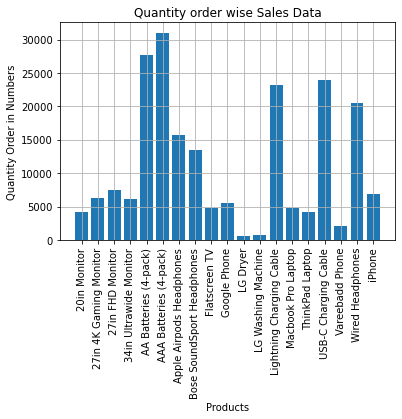

In [51]:
products=[key for key, df in new_df.groupby("Product")]
plt.bar(products,quantity_order)
plt.xlabel("Products")
plt.ylabel("Quantity Order in Numbers")
plt.grid()
plt.title("Quantity order wise Sales Data")
plt.xticks(products,size=10, rotation="vertical")
plt.show()

In [52]:
#let's just check mean price of each and every product before coming to conclusion 
prices= new_df.groupby("Product")["Price Each"].mean()
prices

Product
20in Monitor                   109.99
27in 4K Gaming Monitor         389.99
27in FHD Monitor               149.99
34in Ultrawide Monitor         379.99
AA Batteries (4-pack)            3.84
AAA Batteries (4-pack)           2.99
Apple Airpods Headphones       150.00
Bose SoundSport Headphones      99.99
Flatscreen TV                  300.00
Google Phone                   600.00
LG Dryer                       600.00
LG Washing Machine             600.00
Lightning Charging Cable        14.95
Macbook Pro Laptop            1700.00
ThinkPad Laptop                999.99
USB-C Charging Cable            11.95
Vareebadd Phone                400.00
Wired Headphones                11.99
iPhone                         700.00
Name: Price Each, dtype: float64

<Figure size 1080x576 with 0 Axes>

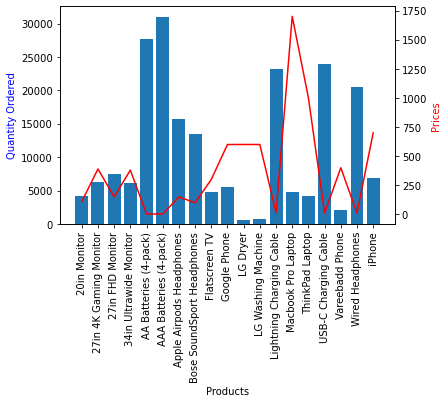

In [53]:
#Let's add the prices data into the quantity ordered graph
plt.figure(figsize=(15,8))
fig, ax1 = plt.subplots()

ax2 = ax1.twinx()
ax1.bar(products,quantity_order)
ax2.plot(products,prices, 'r-')
ax1.set_xlabel('Products')
ax1.set_xticklabels(products,size=10, rotation="vertical")
ax1.set_ylabel('Quantity Ordered', color='b')
ax2.set_ylabel('Prices', color='r')
plt.show()

AAA batteries are most often used in small electronic devices, such as TV remote controls, MP3 players and digital cameras. Devices that require the same voltage, but have a higher current draw, are often designed to use larger batteries such as the AA battery type. So it is natural that this prodcut is very useful for daily livelihood and must have in all familes. Same idea can be given for AA batteries as well which holds the second position as the most selling products.Further from the above graph it is clearly seen that prices of AAA batteries and AA batteries are the lowest and obviously lowest price will make highest demand 